<a href="https://colab.research.google.com/github/emondsarker/classifying-medical-misinfo-with-Machine-Learning/blob/main/CSE_445_EDA_(M).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
import pandas as pd
import matplotlib
import plotly.graph_objects as go

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/cse445_medical_misinfo/Complied dataset 2 - Final v.csv')
df

Text  \
0     ডায়াবেটিস গাছ /গাইনূরা গাছের পাতা খান, ডায়াবেট...   
1     সকাল বিকাল ইনসুলিন কিংবা ট্যাবলেট নয়, এবার আপন...   
2     কোর-আনি আমল এবং ইউনানি ও হোমিও চিকিৎসা দ্বারা ...   
3     হস্তমৈথুন করলে দ্রুত বীর্যপাতের অভ‍্যাস তৈরী হ...   
4        হস্তমৈথুন করলে নিয়মিত মাথাব‍্যাথার সমস‍্যা হয়।   
...                                                 ...   
1490  সোরিয়াসিস, আয়রনের অভাবজনিত রক্তশূন্যতা, ডায়াবে...   
1491  গোসলের পরে নখ কাটুন। নখ সব সময় পরিষ্কার ও শুকন...   
1492  কোনো সেলুনে নখের পরিচর্যার জন্য গেলে ব্যবহৃত য...   
1493  নখের দুই পাশের কোনার অংশ কাটা যাবে না। নখ কাটা...   
1494  নখে ব্যথা কিংবা চাপ লাগে এমন জুতা পরা যাবে না।...   

                                            Translation  Platform  \
0     Eat the leaves of diabetes tree / gynura tree,...  Facebook   
1     No morning or afternoon insulin or tablets, th...  Facebook   
2     Removed by Qur'anic practices and Unani and Ho...  Facebook   
3     Masturbation leads to premature ejaculation, w...  Facebook   
4                Masturbation causes regular headaches.  Facebook   
...                                                 ...       ...   
1490  Psoriasis, iron deficiency anemia, diabetes, h...   Website   
1491  Cut nails after shower. Always keep nails clea...   Website   
1492  When going to a salon for nail care, make sure...   Website   
1493  The corners of both sides of the nail cannot b...   Website   
1494  Shoes that cause pain or pressure on the nails...   Website   

                      Category   Type of Source Name of Source  \
0     noncommunicable diseases  Unverified Page     medica tea   
1     noncommunicable diseases  Unverified Page         Herbs    
2                        other           Person            NaN   
3                sexual health           Person            NaN   
4                sexual health           Person            NaN   
...                        ...              ...            ...   
1490                     other    Verified Page    Prothom Alo   
1491                     other    Verified Page    Prothom Alo   
1492                     other    Verified Page    Prothom Alo   
1493                     other    Verified Page    Prothom Alo   
1494                     other    Verified Page    Prothom Alo   

                                       Page Description  \
0     We are manufacturing and marketing 100 % organ...   
1     All kind of Herbal Facial and hair item Availa...   
2                        Tips and other Beauty solution   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
1490                                 News/Media Company   
1491                                 News/Media Company   
1492                                 News/Media Company   
1493                                 News/Media Company   
1494                                 News/Media Company   

     Positive reaction count Neutral reaction count   \
0                          9                       8   
1                         29                       4   
2                          3                       3   
3                          2                       0   
4                          2                       0   
...                      ...                     ...   
1490                       0                       0   
1491                       0                       0   
1492                       0                       0   
1493                       0                       0   
1494                       0                       0   

      Negative reaction count                    Keywords for search   \
0                          0.0                         ডায়াবেটিস গাছ   
1                          0.0                         ডায়াবেটিস গাছ   
2                          0.0  ডায়াবেটিস কি কেন হয় বাঁচার উপায় কি   
3                          0.0                

Word Cloud 

In [ ]:
! pip install wordcloud bnlp_toolkit

In [ ]:
import numpy as np
import pandas as pd
import cv2
import re

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bnlp.corpus import stopwords, punctuations

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.8/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
CSV_PATH = '/content/drive/MyDrive/cse445_medical_misinfo/Complied dataset 2 - Final v.csv'

In [ ]:
df = pd.read_csv(CSV_PATH)
print(df.columns)
print(df.shape)
df.head()

Index(['Text', 'Translation', 'Platform', 'Category', 'Type of Source',
       'Name of Source', 'Page Description', 'Positive reaction count',
       'Neutral reaction count ', 'Negative reaction count ',
       'Keywords for search ', 'Keywords for search (translation)',
       'Class label ', 'Unnamed: 13', 'Validation Source', 'Type of Source.1'],
      dtype='object')
(1495, 16)


Text  \
0  ডায়াবেটিস গাছ /গাইনূরা গাছের পাতা খান, ডায়াবেট...   
1  সকাল বিকাল ইনসুলিন কিংবা ট্যাবলেট নয়, এবার আপন...   
2  কোর-আনি আমল এবং ইউনানি ও হোমিও চিকিৎসা দ্বারা ...   
3  হস্তমৈথুন করলে দ্রুত বীর্যপাতের অভ‍্যাস তৈরী হ...   
4     হস্তমৈথুন করলে নিয়মিত মাথাব‍্যাথার সমস‍্যা হয়।   

                                         Translation  Platform  \
0  Eat the leaves of diabetes tree / gynura tree,...  Facebook   
1  No morning or afternoon insulin or tablets, th...  Facebook   
2  Removed by Qur'anic practices and Unani and Ho...  Facebook   
3  Masturbation leads to premature ejaculation, w...  Facebook   
4             Masturbation causes regular headaches.  Facebook   

                   Category   Type of Source Name of Source  \
0  noncommunicable diseases  Unverified Page     medica tea   
1  noncommunicable diseases  Unverified Page         Herbs    
2                     other           Person            NaN   
3             sexual health           Person            NaN   
4             sexual health           Person            NaN   

                                    Page Description Positive reaction count  \
0  We are manufacturing and marketing 100 % organ...                       9   
1  All kind of Herbal Facial and hair item Availa...                      29   
2                     Tips and other Beauty solution                       3   
3                                                NaN                       2   
4                                                NaN                       2   

  Neutral reaction count   Negative reaction count   \
0                       8                       0.0   
1                       4                       0.0   
2                       3                       0.0   
3                       0                       0.0   
4                       0                       0.0   

                    Keywords for search   \
0                         ডায়াবেটিস গাছ   
1                         ডায়াবেটিস গাছ   
2  ডায়াবেটিস কি কেন হয় বাঁচার উপায় কি   
3                       #নারীর_হস্তমৈথুন   
4                       #নারীর_হস্তমৈথুন   

                  Keywords for search (translation)    Class label   \
0                                    diabetes plant  Misinformation   
1                                    diabetes plant  Misinformation   
2  What is the cause of diabetes and how to survive  Misinformation   
3                              #female_masturbation  Misinformation   
4                              #female_masturbation  Misinformation   

   Unnamed: 13  Validation Source  Type of Source.1  
0          NaN                NaN               NaN  
1          NaN                NaN               NaN  
2          NaN                NaN               NaN  
3          NaN                NaN               NaN  
4          NaN                NaN               NaN

In [ ]:
df['Text'][:10].values

array(['ডায়াবেটিস গাছ /গাইনূরা গাছের পাতা খান, ডায়াবেটিস নিয়ন্ত্রণে রাখুন',
       'সকাল বিকাল ইনসুলিন কিংবা ট্যাবলেট নয়, এবার আপনার ডায়াবেটিস সম্পূর্ণরুপে নিয়ন্ত্রণ করবে বিদেশি ঔষধি গুণসমৃদ্ধ একটি গাছের পাতা',
       'কোর-আনি আমল এবং ইউনানি ও হোমিও চিকিৎসা দ্বারা নির্মূল করা হয় ইনশাআল্লাহ।@ শারীরিক সমস্যা @\n১। যৌন দূর্বলতা।\n২। শারীরিক দূর্বলতা।\n৩। মেহ- প্রমেহ রোগ।\n৪। ডায়াবেটিস রোগ।\n৫। জন্ডিস রোগ।',
       'হস্তমৈথুন করলে দ্রুত বীর্যপাতের অভ\u200d্যাস তৈরী হয়ে যায়, যা বিয়ের পর সন্তান জন্মদানে ও পরিপূর্ণ সুখলাভে বাধা সৃষ্টি করে',
       ' হস্তমৈথুন করলে নিয়মিত মাথাব\u200d্যাথার সমস\u200d্যা হয়।',
       'হস্তমৈথুন করলে স্মৃতিশক্তি, মেধাশক্তি, বিবেকশক্তি ও দৃষ্টিশক্তি লোপ পায়।',
       'বদনজর, কালোজাদু মানুষকে অনেক সময় রোগ থেকে মুক্ত হতে দেয়না, অনেক এমন প্রমান আছে যে ডাক্তারি অনেক চিকিৎসার পরেও কোন রোগ ধরা পড়ে না, আবার রোগ থাকলে চিকিৎসা করলে ভালো হয়না। তাই বদনজর, কালোজাদুর সমস্যা থাকলে সেটা কাটাকাটি করে নিয়ে তারপর আইবিএসের জন্য মানষিক ডাক্তারের পরামর্শে চিকিৎসা করান। ',
       'হস্ত

In [ ]:
def clean(text):
    text = re.sub('[%s]' % re.escape(punctuations), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\xa0', '', text)
    
    return text

cleaned_text = df['Text'].apply(lambda x: clean(str(x)))
cleaned_text

0       ডায়াবেটিস গাছ গাইনূরা গাছের পাতা খান ডায়াবেটিস...
1       সকাল বিকাল ইনসুলিন কিংবা ট্যাবলেট নয় এবার আপনা...
2       কোরআনি আমল এবং ইউনানি ও হোমিও চিকিৎসা দ্বারা ন...
3       হস্তমৈথুন করলে দ্রুত বীর্যপাতের অভ‍্যাস তৈরী হ...
4           হস্তমৈথুন করলে নিয়মিত মাথাব‍্যাথার সমস‍্যা হয়
                              ...                        
1490    সোরিয়াসিস আয়রনের অভাবজনিত রক্তশূন্যতা ডায়াবেটি...
1491    গোসলের পরে নখ কাটুন নখ সব সময় পরিষ্কার ও শুকনা...
1492    কোনো সেলুনে নখের পরিচর্যার জন্য গেলে ব্যবহৃত য...
1493    নখের দুই পাশের কোনার অংশ কাটা যাবে না নখ কাটার...
1494    নখে ব্যথা কিংবা চাপ লাগে এমন জুতা পরা যাবে না ...
Name: Text, Length: 1495, dtype: object

In [ ]:
refined_sentence = " ".join(cleaned_text)

In [ ]:
!wget https://www.omicronlab.com/download/fonts/kalpurush.ttf

--2022-11-29 19:29:15--  https://www.omicronlab.com/download/fonts/kalpurush.ttf
Resolving www.omicronlab.com (www.omicronlab.com)... 172.104.46.32
Connecting to www.omicronlab.com (www.omicronlab.com)|172.104.46.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 314592 (307K) [application/octet-stream]
Saving to: ‘kalpurush.ttf’

kalpurush.ttf       100%[===================>] 307.22K   422KB/s    in 0.7s    

2022-11-29 19:29:17 (422 KB/s) - ‘kalpurush.ttf’ saved [314592/314592]



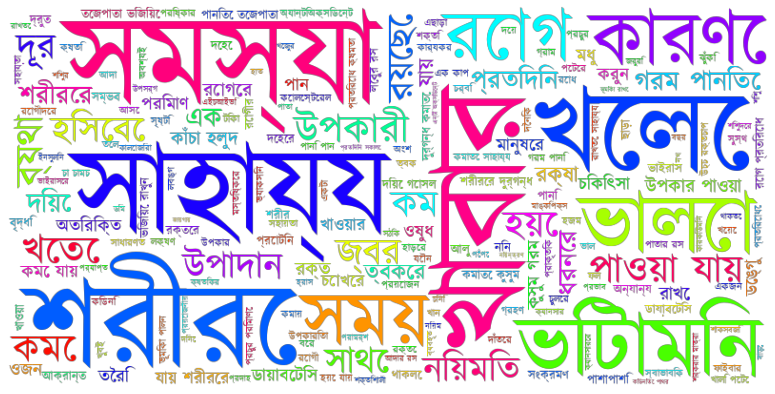

In [ ]:
#mask = get_mask("pikachu.png")
regex = r"[\u0980-\u09FF]+"

wc = WordCloud(width=800, height=400, mode="RGBA",background_color=None, colormap="hsv", stopwords = stopwords, font_path="kalpurush.ttf", regexp=regex).generate(refined_sentence)

plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

result = wc.to_file("Bengali_word_cloud.png")

Document Term Matrix  

In [ ]:
import re

def clean(string):
    string = re.sub('[%s]' % re.escape(punctuations), '', string)
    string = re.sub('\n', '', string)
    string = re.sub('\w*\d\w*', '', string)
    string = re.sub('\xa0', '', string)

    # Replace all line breaks with a space
    string = re.sub('\n', ' ', string)
    # Replace all special characters with a space
    #string = re.sub('[^A-Za-z0-9]+', ' ', string)
    # Replace all single characters with a space
    string = re.sub(r'\b[a-zA-Z]\b', ' ', string)# Replace all double spaces with one space
    string = re.sub(' +', ' ', string)# Remove leading and trailing spaces
    string = string.strip()
    # Make all text lower case
    string = string.lower()
    
    return string

cleaned_text2 = df['Text'].apply(lambda x: clean(str(x)))
cleaned_text2

0       ডায়াবেটিস গাছ গাইনূরা গাছের পাতা খান ডায়াবেটিস...
1       সকাল বিকাল ইনসুলিন কিংবা ট্যাবলেট নয় এবার আপনা...
2       কোরআনি আমল এবং ইউনানি ও হোমিও চিকিৎসা দ্বারা ন...
3       হস্তমৈথুন করলে দ্রুত বীর্যপাতের অভ‍্যাস তৈরী হ...
4           হস্তমৈথুন করলে নিয়মিত মাথাব‍্যাথার সমস‍্যা হয়
                              ...                        
1490    সোরিয়াসিস আয়রনের অভাবজনিত রক্তশূন্যতা ডায়াবেটি...
1491    গোসলের পরে নখ কাটুন নখ সব সময় পরিষ্কার ও শুকনা...
1492    কোনো সেলুনে নখের পরিচর্যার জন্য গেলে ব্যবহৃত য...
1493    নখের দুই পাশের কোনার অংশ কাটা যাবে না নখ কাটার...
1494    নখে ব্যথা কিংবা চাপ লাগে এমন জুতা পরা যাবে না ...
Name: Text, Length: 1495, dtype: object

In [ ]:
refined_sentence = " ".join(cleaned_text2)
refined_sentence

'ডায়াবেটিস গাছ গাইনূরা গাছের পাতা খান ডায়াবেটিস নিয়ন্ত্রণে রাখুন সকাল বিকাল ইনসুলিন কিংবা ট্যাবলেট নয় এবার আপনার ডায়াবেটিস সম্পূর্ণরুপে নিয়ন্ত্রণ করবে বিদেশি ঔষধি গুণসমৃদ্ধ একটি গাছের পাতা কোরআনি আমল এবং ইউনানি ও হোমিও চিকিৎসা দ্বারা নির্মূল করা হয় ইনশাআল্লাহ শারীরিক সমস্যা যৌন দূর্বলতা শারীরিক দূর্বলতা মেহ প্রমেহ রো ডায়াবেটিস রো জন্ডিস রোগ হস্তমৈথুন করলে দ্রুত বীর্যপাতের অভ\u200d্যাস তৈরী হয়ে যায় যা বিয়ের পর সন্তান জন্মদানে ও পরিপূর্ণ সুখলাভে বাধা সৃষ্টি করে হস্তমৈথুন করলে নিয়মিত মাথাব\u200d্যাথার সমস\u200d্যা হয় হস্তমৈথুন করলে স্মৃতিশক্তি মেধাশক্তি বিবেকশক্তি ও দৃষ্টিশক্তি লোপ পায় বদনজর কালোজাদু মানুষকে অনেক সময় রোগ থেকে মুক্ত হতে দেয়না অনেক এমন প্রমান আছে যে ডাক্তারি অনেক চিকিৎসার পরেও কোন রোগ ধরা পড়ে না আবার রোগ থাকলে চিকিৎসা করলে ভালো হয়না তাই বদনজর কালোজাদুর সমস্যা থাকলে সেটা কাটাকাটি করে নিয়ে তারপর আইবিএসের জন্য মানষিক ডাক্তারের পরামর্শে চিকিৎসা করান হস্তমৈথুন করলে একটা সময় স্বাস্থ নষ্ট হয়ে রোগাক্রান্ত আকার ধারণ করে হস্তমৈথুন করতে থাকলে বীর্যে ডিম্বাণুর পরিমাণ কমে গিয়ে একটা সময় 

In [ ]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=cleaned_text2.apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [ ]:
df_grouped=df[['Category','lemmatized']].groupby(by='Category').agg(lambda x:' '.join(x))
df_grouped.head(7)

lemmatized
Category                                                                   
disease                   এই সুপার ম্যালেরিয়া হচ্ছে ম্যালেরিয়া জীবাণুর...
drugs or smoking          গাঁজা খেলে বলেস্মৃতি শক্তি বাড়ে গাঁজা ক্যান্সা...
medical treatments        বদনজর কালোজাদু মানুষকে অনেক সময় রোগ থেকে মুক্ত...
noncommunicable diseases  ডায়াবেটিস গাছ গাইনূরা গাছের পাতা খান ডায়াবেটিস...
nutrition                 ডাক্তাররা বলছেন আনারস ও দুধ একসাথে খেলে বিষক্র...
other                     কোরআনি আমল এবং ইউনানি ও হোমিও চিকিৎসা দ্বারা ন...
pandemics                 স্বাস্থ্যবিধি এখন বেশ সংক্ষিপ্ত শুধুমাত্র মাস্...

In [ ]:
df_grouped.astype(str)

lemmatized
Category                                                                   
disease                   এই সুপার ম্যালেরিয়া হচ্ছে ম্যালেরিয়া জীবাণুর...
drugs or smoking          গাঁজা খেলে বলেস্মৃতি শক্তি বাড়ে গাঁজা ক্যান্সা...
medical treatments        বদনজর কালোজাদু মানুষকে অনেক সময় রোগ থেকে মুক্ত...
noncommunicable diseases  ডায়াবেটিস গাছ গাইনূরা গাছের পাতা খান ডায়াবেটিস...
nutrition                 ডাক্তাররা বলছেন আনারস ও দুধ একসাথে খেলে বিষক্র...
other                     কোরআনি আমল এবং ইউনানি ও হোমিও চিকিৎসা দ্বারা ন...
pandemics                 স্বাস্থ্যবিধি এখন বেশ সংক্ষিপ্ত শুধুমাত্র মাস্...
sexual health             হস্তমৈথুন করলে দ্রুত বীর্যপাতের অভ‍্যাস তৈরী হ...
vaccines                  টিকা খুব কমই স্নায়বিক উপসর্গ সৃষ্টি করে গরুর ...

In [ ]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(7)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


acne  act  affect  agent  aid  aidsএ  alarm  \
Category                                                                
disease                      0    0       0      0    0      1      0   
drugs or smoking             0    0       0      0    0      0      0   
medical treatments           0    0       0      0    0      0      0   
noncommunicable diseases     0    0       0      0    0      0      0   
nutrition                    3    1       0      1    0      0      0   
other                        0    0       0      0    0      0      0   
pandemics                    0    0       0      0    0      0      0   

                          alzheimer  anti  antiinflammatory  ...  য়যক  য়র  \
Category                                                     ...            
disease                           0     0                 0  ...    0   0   
drugs or smoking                  0     0                 0  ...    0   0   
medical treatments                1     1                 0  ...    0  11   
noncommunicable diseases          0     0                 0  ...    1   0   
nutrition                         1     0                 1  ...    0   2   
other                             0     0                 0  ...    0   0   
pandemics                         0     0                 0  ...    0   0   

                          য়রক  য়রনম  য়রয়  য়শর  য়স  ৷গর  𝗠𝗔𝗦𝗛𝗥𝗨𝗠  𝗣𝗢𝗪𝗗𝗘𝗥আপন  
Category                                                                    
disease                     0     0    0    0   0    0        0          0  
drugs or smoking            0     0    0    0   0    0        0          0  
medical treatments          1     0    1    0   1    0        1          1  
noncommunicable diseases    1     0    0    1   0    0        0          0  
nutrition                   0     0    0    0   0    0        0          0  
other                       0     1    0    0   0    1        0          0  
pandemics                   0     0    0    0   0    0        0          0  

[7 rows x 1588 columns]

In [ ]:
refined_sentence = " ".join(df_grouped['lemmatized'])
refined_sentence

'এই সুপার ম্যালেরিয়া হচ্ছে ম্যালেরিয়া জীবাণুর বিপজ্জনক সংস্করণ যা রোগ সারাতে বর্তমানে প্রচলিত প্রধান ওষুধে নিরাময়যোগ্য নয় নতুন এক গবেষণায় দেখা গেছে ম্যালেরিয়ার জীবাণু বহনকারী মশা লোকজনকে যতো কামড় দিয়ে থাকে তার শতাংশই ঘটে দিনের বেলায় এবং ঘরের ভেতরে ধারণা করা হয় 🐕 🐕 🐕 নিশ্চিতভাবে গন্ধ শুঁকে ম্যালেরিয়া শনাক্ত করতে পারে ম্যালেরিয়া দূর করবে কুকুর ডেঙ্গু ও চিকুনগুনিয়ার এই দুইটি রোগের জন্যই দায়ী এডিস মশা সাধারণত সকালের দিকে এবং সন্ধ্যার আগে এডিস কামড়ায় ফলে এই দুই সময়ে ঘরের দরজা জানালা বন্ধ রাখতে হবে চিকুনগুনিয়া রোগও এডিস মশার মাধ্যমে ছড়ায় চিকুনগুনিয়া জ্বরের লক্ষণ সাধারণ ভাইরাল ফিভারের মত এডিস মশা পাত্রে জমা পরিষ্কার পানিতে জন্মায় সাধারণত বর্ষাকালে এর ঘনত্ব বেশি হয় ফলে ডেঙ্গু রোগের প্রাদুর্ভাবও এ সময়ে বেড়ে যায় মশা যেহেতু চামড়া ভেদ করে রক্ত পান করে তাই চামড়ার ওপর ঘন যেকোন ধরণের তেলই মশাকে কিছুটা প্রতিহত করতে পারে বলে আমি মনে করি চিকিৎসকদের মতে ডেঙ্গু একাধিকবারও হতে পারে আর সে কারণে সচেতন থাকা বেশি জরুরি চিকিৎসকরা বলছেন এক ব্যক্তি একই সাথে কোভি এবং ডেঙ্গু জ্বরে আক্রান্

In [ ]:
type(data)

scipy.sparse.csr.csr_matrix

In [ ]:
%cd /content

/content


In [ ]:
!wget https://www.omicronlab.com/download/fonts/kalpurush.ttf

--2022-12-01 02:46:48--  https://www.omicronlab.com/download/fonts/kalpurush.ttf
Resolving www.omicronlab.com (www.omicronlab.com)... 172.104.46.32
Connecting to www.omicronlab.com (www.omicronlab.com)|172.104.46.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 314592 (307K) [application/octet-stream]
Saving to: ‘kalpurush.ttf’

kalpurush.ttf       100%[===================>] 307.22K   385KB/s    in 0.8s    

2022-12-01 02:46:50 (385 KB/s) - ‘kalpurush.ttf’ saved [314592/314592]



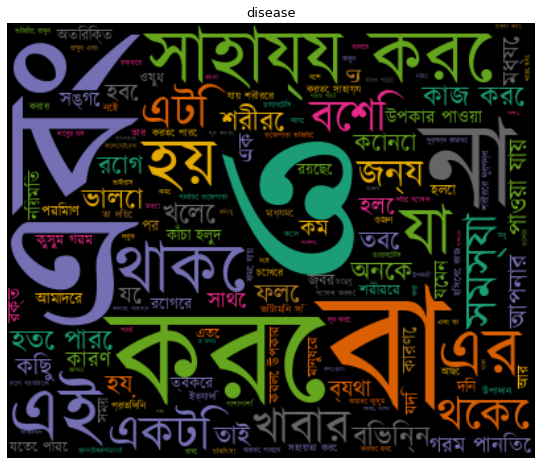

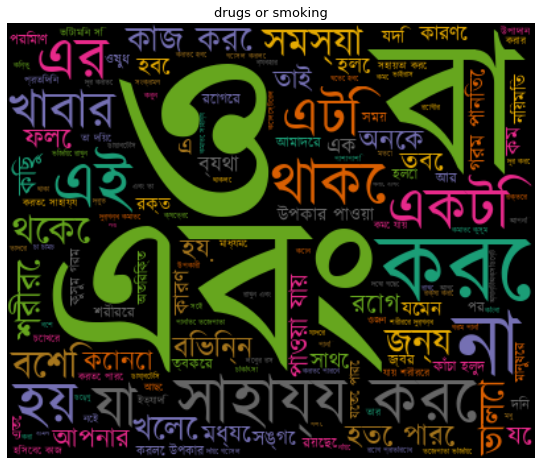

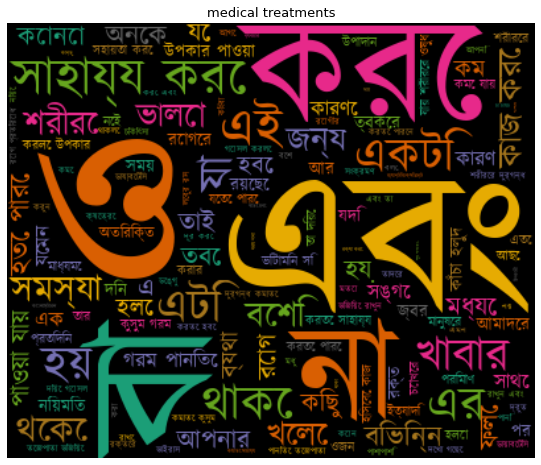

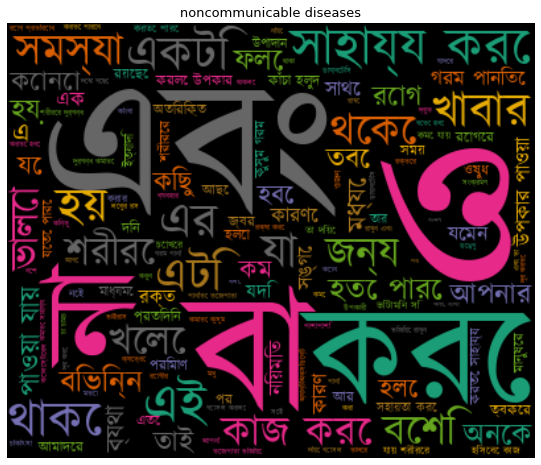

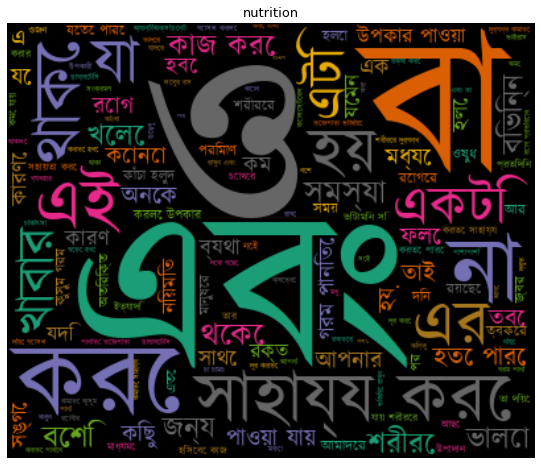

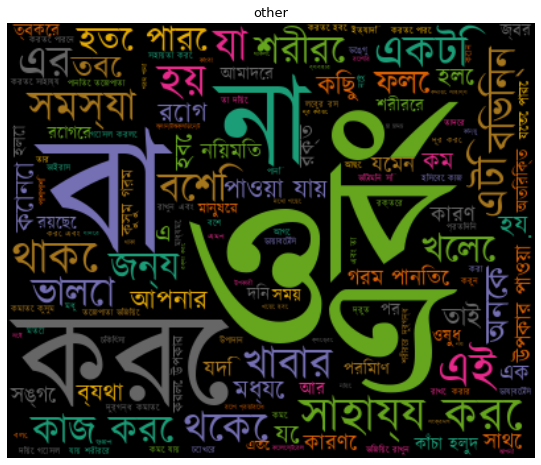

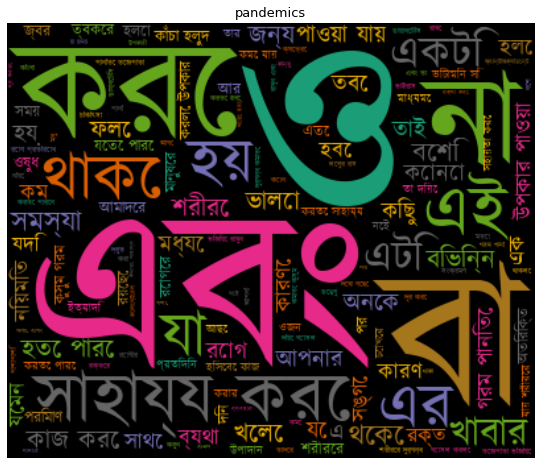

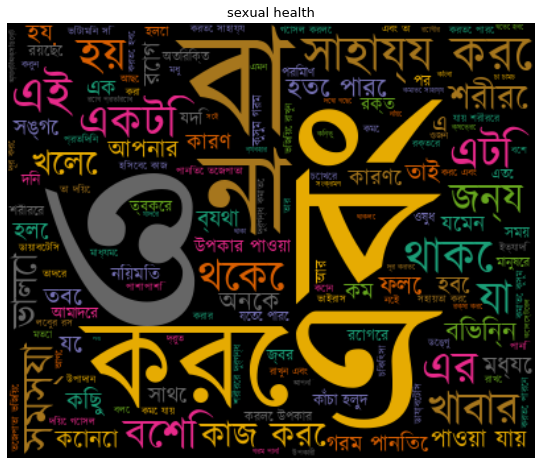

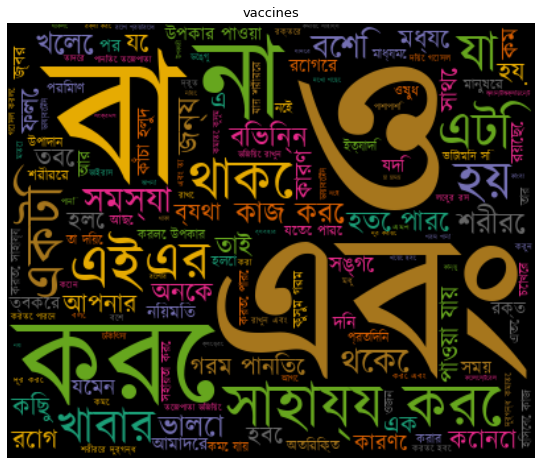

In [ ]:
#WordCloud for each category 

# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  regex = r"[\u0980-\u09FF]+"
  wc = WordCloud(width=400, height=330, mode="RGBA", max_words=150,colormap="Dark2", font_path="kalpurush.ttf", regexp=regex).generate(refined_sentence)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index, Category in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[Category].sort_values(ascending=False),Category)

In [ ]:
# for gram, count in word_count.most_common(25):
#     print(gram.ljust(20), count)

Sentiment analysis 

In [ ]:
from textblob import TextBlob
df['polarity']=df['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [ ]:
print("3 Random Reviews with Highest Polarity:")
for index,Text in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['Text']):
  print('Text {}:\n'.format(index+1),Text)

3 Random Reviews with Highest Polarity:
Text 1:
 HIV not only affects your body but also your skin – Yes, there are a few skin symptoms which could be the first sign to alarm you of suffering from AIDS. Blistering rashes, Thrush and Molluscum contagiosum are the skin conditions which indicate that you may be HIV positive. In such a case, you must get tested immediately.
Text 2:
 ডায়াবেটিস গাছ /গাইনূরা গাছের পাতা খান, ডায়াবেটিস নিয়ন্ত্রণে রাখুন
Text 3:
 তাৎক্ষণিক সমাধানের জন্য সামান্য লবণ দিয়ে কাঁচা আদা চিবিয়ে খেতে হবে। কিন্তু রোগ সারাতে হলে প্রতিদিন দুবেলা এক চা–চামচ করে আদার রস, লেবুর রস ও মধু গরম এক কাপ পানিতে মিশিয়ে চায়ের মতো করে খেলে মাইগ্রেনের সমস্যা দূর হবে।


In [ ]:
print("3 Random Reviews with Lowest Polarity:")
for index,Text in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:3].index]['Text']):
  print('Text {}:\n'.format(index+1),Text)

3 Random Reviews with Lowest Polarity:
Text 1:
 একটি নববী চিকিৎসা ব্যবস্থা।
এটি আরবী শব্দ ‘আল-হাজম’ থেকে এসেছে। যার অর্থ
চোষা বা টেনে নেওয়া।আধুনিক চিকিৎসা বিজ্ঞানের পরিভাষায় কাপিং
থেরাপি (Wet Cupping Therapy)বলে।
হিজামার মাধ্যমে নেগেটিভ প্রেসার দিয়ে টেনে দূষিত রক্ত
(Toxin) বের করা হয়।
এতে শরীরের মাংসপেশী সমূহের রক্ত প্রবাহ দ্রুততর হয়।
Text 2:
 শতভাগ নিরাপদ ও কার্যকর সম্পুর্ন প্রাকৃতিক ও ভেষজ উপাদান দিয়ে ইউনানি ও আয়ুর্বেদ ফর্মুলায় তৈরি হোমমেইড ন্যাচারাল ঔষধ দিয়ে চিকিৎসা করি। তিন মাসের কোর্স সম্পুর্ন করলে ইনশাআল্লাহ পুরোপুরি সুস্থ হয়ে যাবেন।
Text 3:
 চলেস্টরোল কমাতে সাহায্য করে, ক্যান্সার যুদ্ধের বৈশিষ্ট থাকে, ব্যাকটেরিয়া মেরে ফেলতে সাহায্য করে কালোজিরা
